In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import find_peaks

In [2]:
base_path = '/Users/bordonis/ResearchActivities/Perovskite/XRD/August2024/'


Load datafiles for MAPbBr3 crystals

In [4]:
file_path_SC67_A = os.path.join(base_path,'SC67_A/SC67-A_t2t.csv')
file_path_SC67_B = os.path.join(base_path,'SC67_B/SC67-B_t2t.csv')


df_SC67_B = pd.read_csv(file_path_SC67_B, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_SC67_B.head()

df_SC67_A = pd.read_csv(file_path_SC67_A, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_SC67_A.head()


,2theta,counts
0,7.00,0.000000
1,7.01,0.000000
2,7.02,3.193791
3,7.03,0.000000
4,7.04,0.000000


Load files from CSPbBR3 crystals

In [5]:
file_path_CS104_A = os.path.join(base_path,'CS104_A/CS104-A_t2t.csv')
file_path_CS106_A = os.path.join(base_path,'CS106_A/CS106-A_t2t.csv')


df_CS104_A = pd.read_csv(file_path_CS104_A, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_CS104_A.head()

df_CS106_A = pd.read_csv(file_path_CS106_A, sep=',', header=None, skiprows=2, names=['2theta', 'counts'] )
df_CS106_A.head()


,2theta,counts
0,7.00,0.0
1,7.01,0.0
2,7.02,0.0
3,7.03,0.0
4,7.04,0.0


function to draw the bare XRD plot 

In [16]:
def plotXRD(ax1, dfA, dfB, crystaltype, labelA, labelB, cA, cB, xmin, xmax):
    #fig = plt.figure(figsize=(35,20))
    #ax1 = fig.add_subplot(111)
    ax1.set_xlabel("2$\\theta$ ($\degree)$", fontsize=30)
    ax1.tick_params(axis='x', labelsize=30)
    ax1.set_ylabel("counts", fontsize=30)
    ax1.tick_params(axis='y', labelsize=30)
    ax1.set_title(crystaltype, fontsize=40)
    #ax1.set_yscale('log')
    #ax1.grid(True)
    ax1.plot(dfA['2theta'], dfA['counts'], label=labelA, c=cA, linewidth=3)
    ax1.plot(dfB['2theta'], dfB['counts'], label=labelB, c=cB, linewidth=2)
    ax1.set_xlim(xmin, xmax)
    ax1.legend(fontsize="30", frameon=False)

    #plt.show()
    return ax1

In [7]:
def myfindpeak(df):
    _df = df
    peaks, _ = find_peaks(_df['counts'], threshold=65, prominence=[60]) 
    peaks_x = _df['2theta'].iloc[peaks]
    peaks_y = _df['counts'].iloc[peaks]
    num_peaks = len(peaks)

    return peaks, peaks_x, peaks_y, num_peaks

In [8]:
def printpeaks(df, peaks, crystal):
    peaks_x = df['2theta'].iloc[peaks]
    peaks_y = df['counts'].iloc[peaks]
    n_peaks = len(peaks)
    
    #print what has been found: 
    print('\n\n -----', crystal, ' ---- ')

    print('num of peaks found', n_peaks)
    print('peaks are:' )

    for x, y in zip(peaks_x, peaks_y):
        print('x ', "%0.2f" %x , ';  y ', "%0.2f" %y )

In [9]:
peaks_SC67_B, _ = find_peaks(df_SC67_B['counts'], height=65, prominence=[60]) 
printpeaks(df_SC67_B, peaks_SC67_B, 'SC67-B')

peaks_SC67_A, _ = find_peaks(df_SC67_A['counts'], height=65, prominence=[60]) 
printpeaks(df_SC67_A, peaks_SC67_A, 'SC67-A')



 ----- SC67-B  ---- 
num of peaks found 8
peaks are:
x  14.94 ;  y  1387836.67
x  29.97 ;  y  286.82
x  30.12 ;  y  3445042.92
x  45.88 ;  y  1022042.92
x  62.62 ;  y  442385.94
x  81.02 ;  y  12523.78
x  102.42 ;  y  9293.18
x  130.83 ;  y  562.10


 ----- SC67-A  ---- 
num of peaks found 10
peaks are:
x  14.90 ;  y  437216.77
x  30.00 ;  y  11406.22
x  30.05 ;  y  881490.10
x  45.67 ;  y  505.09
x  45.76 ;  y  190071.99
x  62.33 ;  y  262.12
x  62.45 ;  y  116384.05
x  80.78 ;  y  6020.43
x  102.08 ;  y  5341.95
x  130.24 ;  y  254.95


In [10]:
#peaks_CS104_A, _ = find_peaks(df_CS104_A['counts'], threshold=40, prominence=[20]) 
peaks_CS104_A, _ = find_peaks(df_CS104_A['counts'], height=70, prominence=[40]) 
printpeaks(df_CS104_A, peaks_CS104_A, 'CS104-A')

#peaks_CS106_A, _ = find_peaks(df_CS106_A['counts'], threshold=40, prominence=[20]) 
peaks_CS106_A, _ = find_peaks(df_CS106_A['counts'], height=70, prominence=[40]) 
printpeaks(df_CS106_A, peaks_CS106_A, 'CS106-A')



 ----- CS104-A  ---- 
num of peaks found 10
peaks are:
x  15.06 ;  y  1913.65
x  15.22 ;  y  33691.85
x  30.38 ;  y  7281.62
x  30.70 ;  y  174971.89
x  30.83 ;  y  110.73
x  46.29 ;  y  104.11
x  46.78 ;  y  537.44
x  63.20 ;  y  564.74
x  63.92 ;  y  1969.85
x  105.12 ;  y  70.10


 ----- CS106-A  ---- 
num of peaks found 11
peaks are:
x  15.06 ;  y  5233.30
x  15.22 ;  y  6368.36
x  30.38 ;  y  93695.59
x  30.70 ;  y  51544.51
x  46.28 ;  y  937.67
x  46.79 ;  y  664.32
x  63.20 ;  y  4754.71
x  63.93 ;  y  5347.40
x  82.86 ;  y  81.13
x  103.62 ;  y  434.23
x  105.12 ;  y  458.79


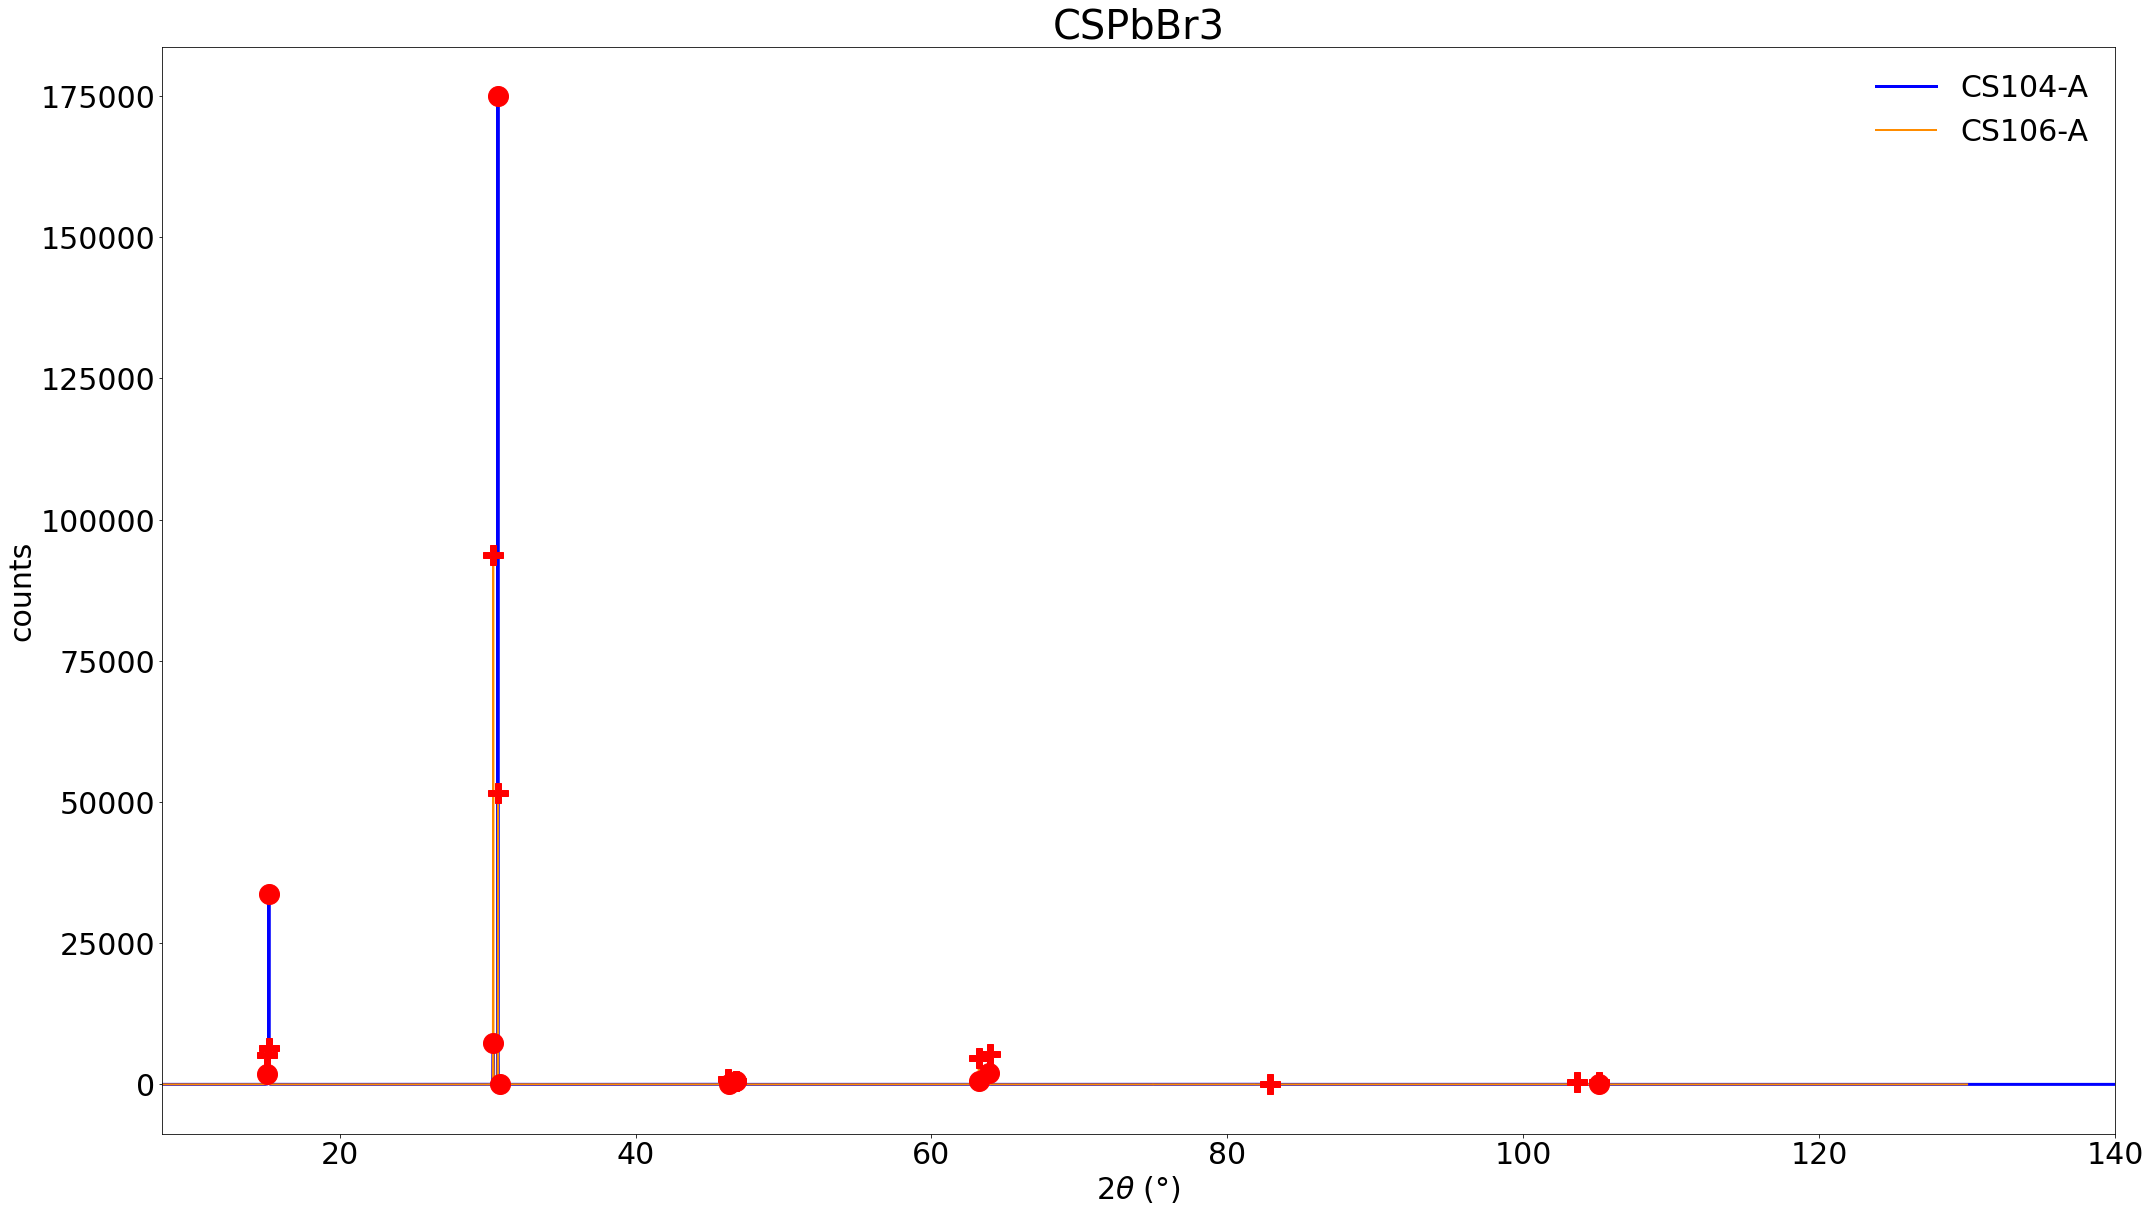

In [17]:
fig = plt.figure(figsize=(35,20))
ax1 = fig.add_subplot(111)
ax = plotXRD(ax1, df_CS104_A, df_CS106_A, 'CSPbBr3', 'CS104-A', 'CS106-A', 'b', 'darkorange', 8,140)

#to draw markers on the peaks:
peaks_x_CS104_A = df_CS104_A['2theta'].iloc[peaks_CS104_A]
peaks_y_CS104_A = df_CS104_A['counts'].iloc[peaks_CS104_A]


peaks_x_CS106_A= df_CS106_A['2theta'].iloc[peaks_CS106_A]
peaks_y_CS106_A = df_CS106_A['counts'].iloc[peaks_CS106_A]

for i, peak in enumerate(peaks_CS104_A):
    ax.plot(peaks_x_CS104_A.iloc[i], peaks_y_CS104_A.iloc[i], 'ro', markersize=20)

for i, peak in enumerate(peaks_CS106_A):
    ax.plot(peaks_x_CS106_A.iloc[i], peaks_y_CS106_A.iloc[i], 'rP', markersize=20)

plt.show()    


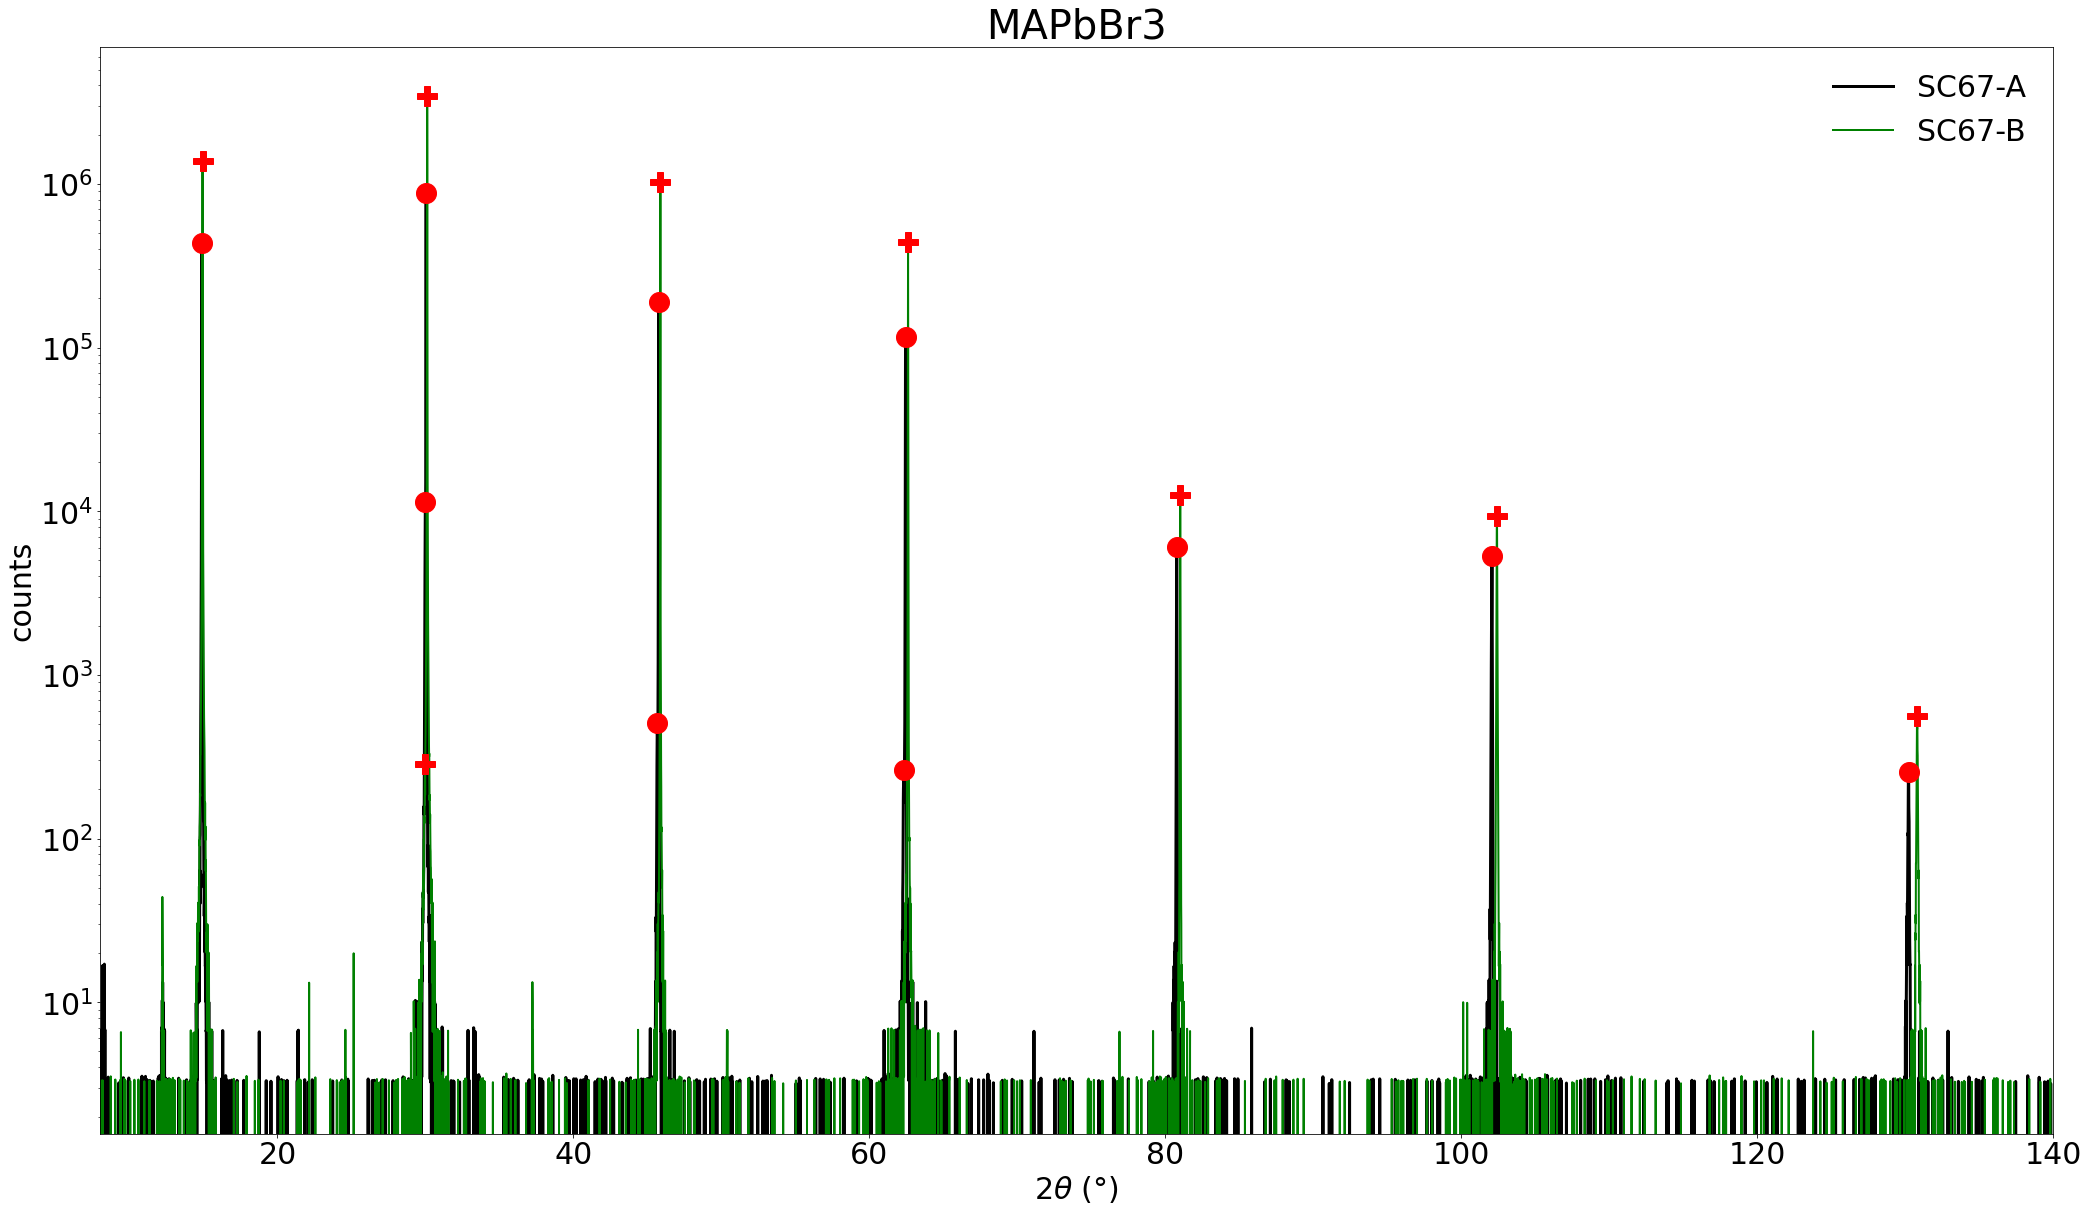

In [12]:
fig = plt.figure(figsize=(35,20))
ax1 = fig.add_subplot(111)
ax = plotXRD(ax1, df_SC67_A, df_SC67_B, 'MAPbBr3', 'SC67-A', 'SC67-B', 'black', 'green', 8, 140)

#to draw markers on the peaks:
peaks_x_SC67_A = df_SC67_A['2theta'].iloc[peaks_SC67_A]
peaks_y_SC67_A = df_SC67_A['counts'].iloc[peaks_SC67_A]


peaks_x_SC67_B = df_SC67_B['2theta'].iloc[peaks_SC67_B]
peaks_y_SC67_B = df_SC67_B['counts'].iloc[peaks_SC67_B]

for i, peak in enumerate(peaks_SC67_A):
    ax.plot(peaks_x_SC67_A.iloc[i], peaks_y_SC67_A.iloc[i], 'ro', markersize=20)

for i, peak in enumerate(peaks_SC67_B):
    ax.plot(peaks_x_SC67_B.iloc[i], peaks_y_SC67_B.iloc[i], 'rP', markersize=20)
    


In [13]:
def plotpeakbypeak(x_ranges, dfA, dfB, crystaltype, labelA, labelB, cA, cB):
    
    #define ranges for the subplots 
    #x_ranges = [(8, 20), (20, 40), (40, 50), (50, 70), (70, 90), (90,110), (110,140)] 
    #x_ranges = [(12, 18), (25, 35), (44, 48), (57, 67), (77, 83), (100,107), (125,135)] 

    fig, axs = plt.subplots(2, 4, figsize=(40, 20))  # Adjust figsize as needed

    # Flatten the axs array for easy iteration
    axs_flat = axs.flatten()

    for i, (xmin, xmax) in enumerate(x_ranges):
        if i < len(axs_flat):
            ax = axs_flat[i]
            
            # Call the plotXRD function for each subplot
            plotXRD(
                ax,
                dfA,
                dfB,
                crystaltype,
                labelA,
                labelB,
                cA,
                cB,
                xmin,
                xmax
            )
        else:
            print(f"Warning: More x_ranges ({len(x_ranges)}) than available subplots (8).")

    # If there are more subplots than x_ranges, hide the unused axes
    for j in range(len(x_ranges), len(axs_flat)):
        fig.delaxes(axs_flat[j])

    plt.tight_layout()

    # Show the plots
    plt.show()

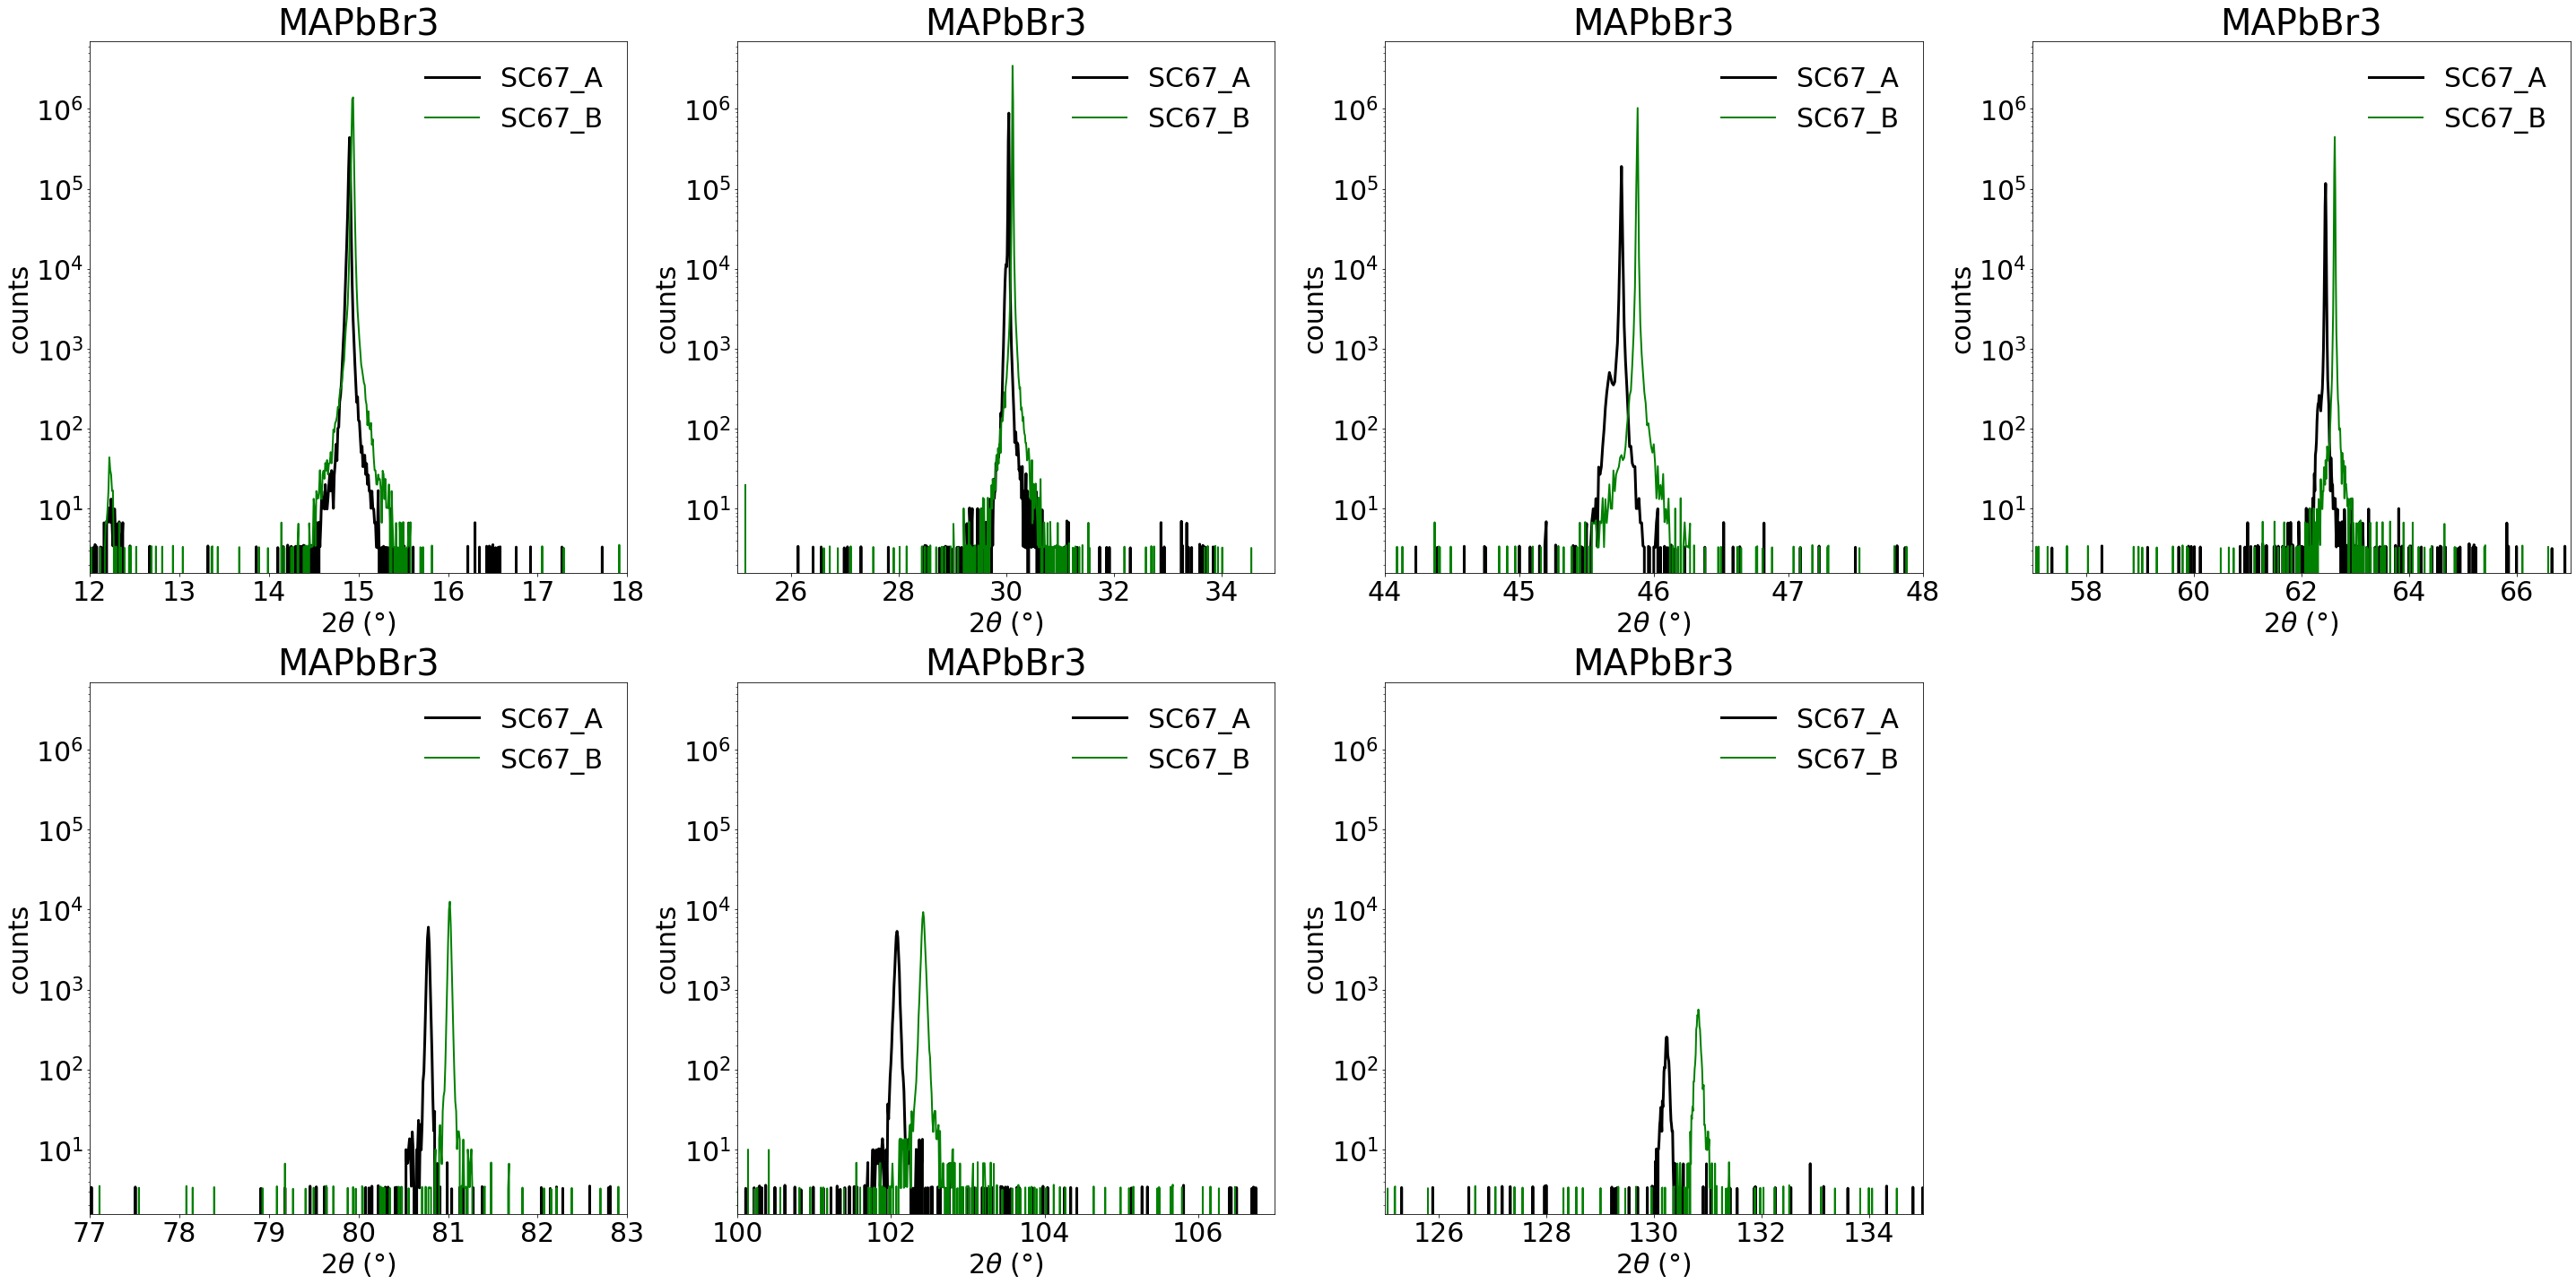

In [14]:
x_ranges = [(12, 18), (25, 35), (44, 48), (57, 67), (77, 83), (100,107), (125,135)] 

plotpeakbypeak(x_ranges, df_SC67_A, df_SC67_B, "MAPbBr3", "SC67_A", "SC67_B","black" , "green")

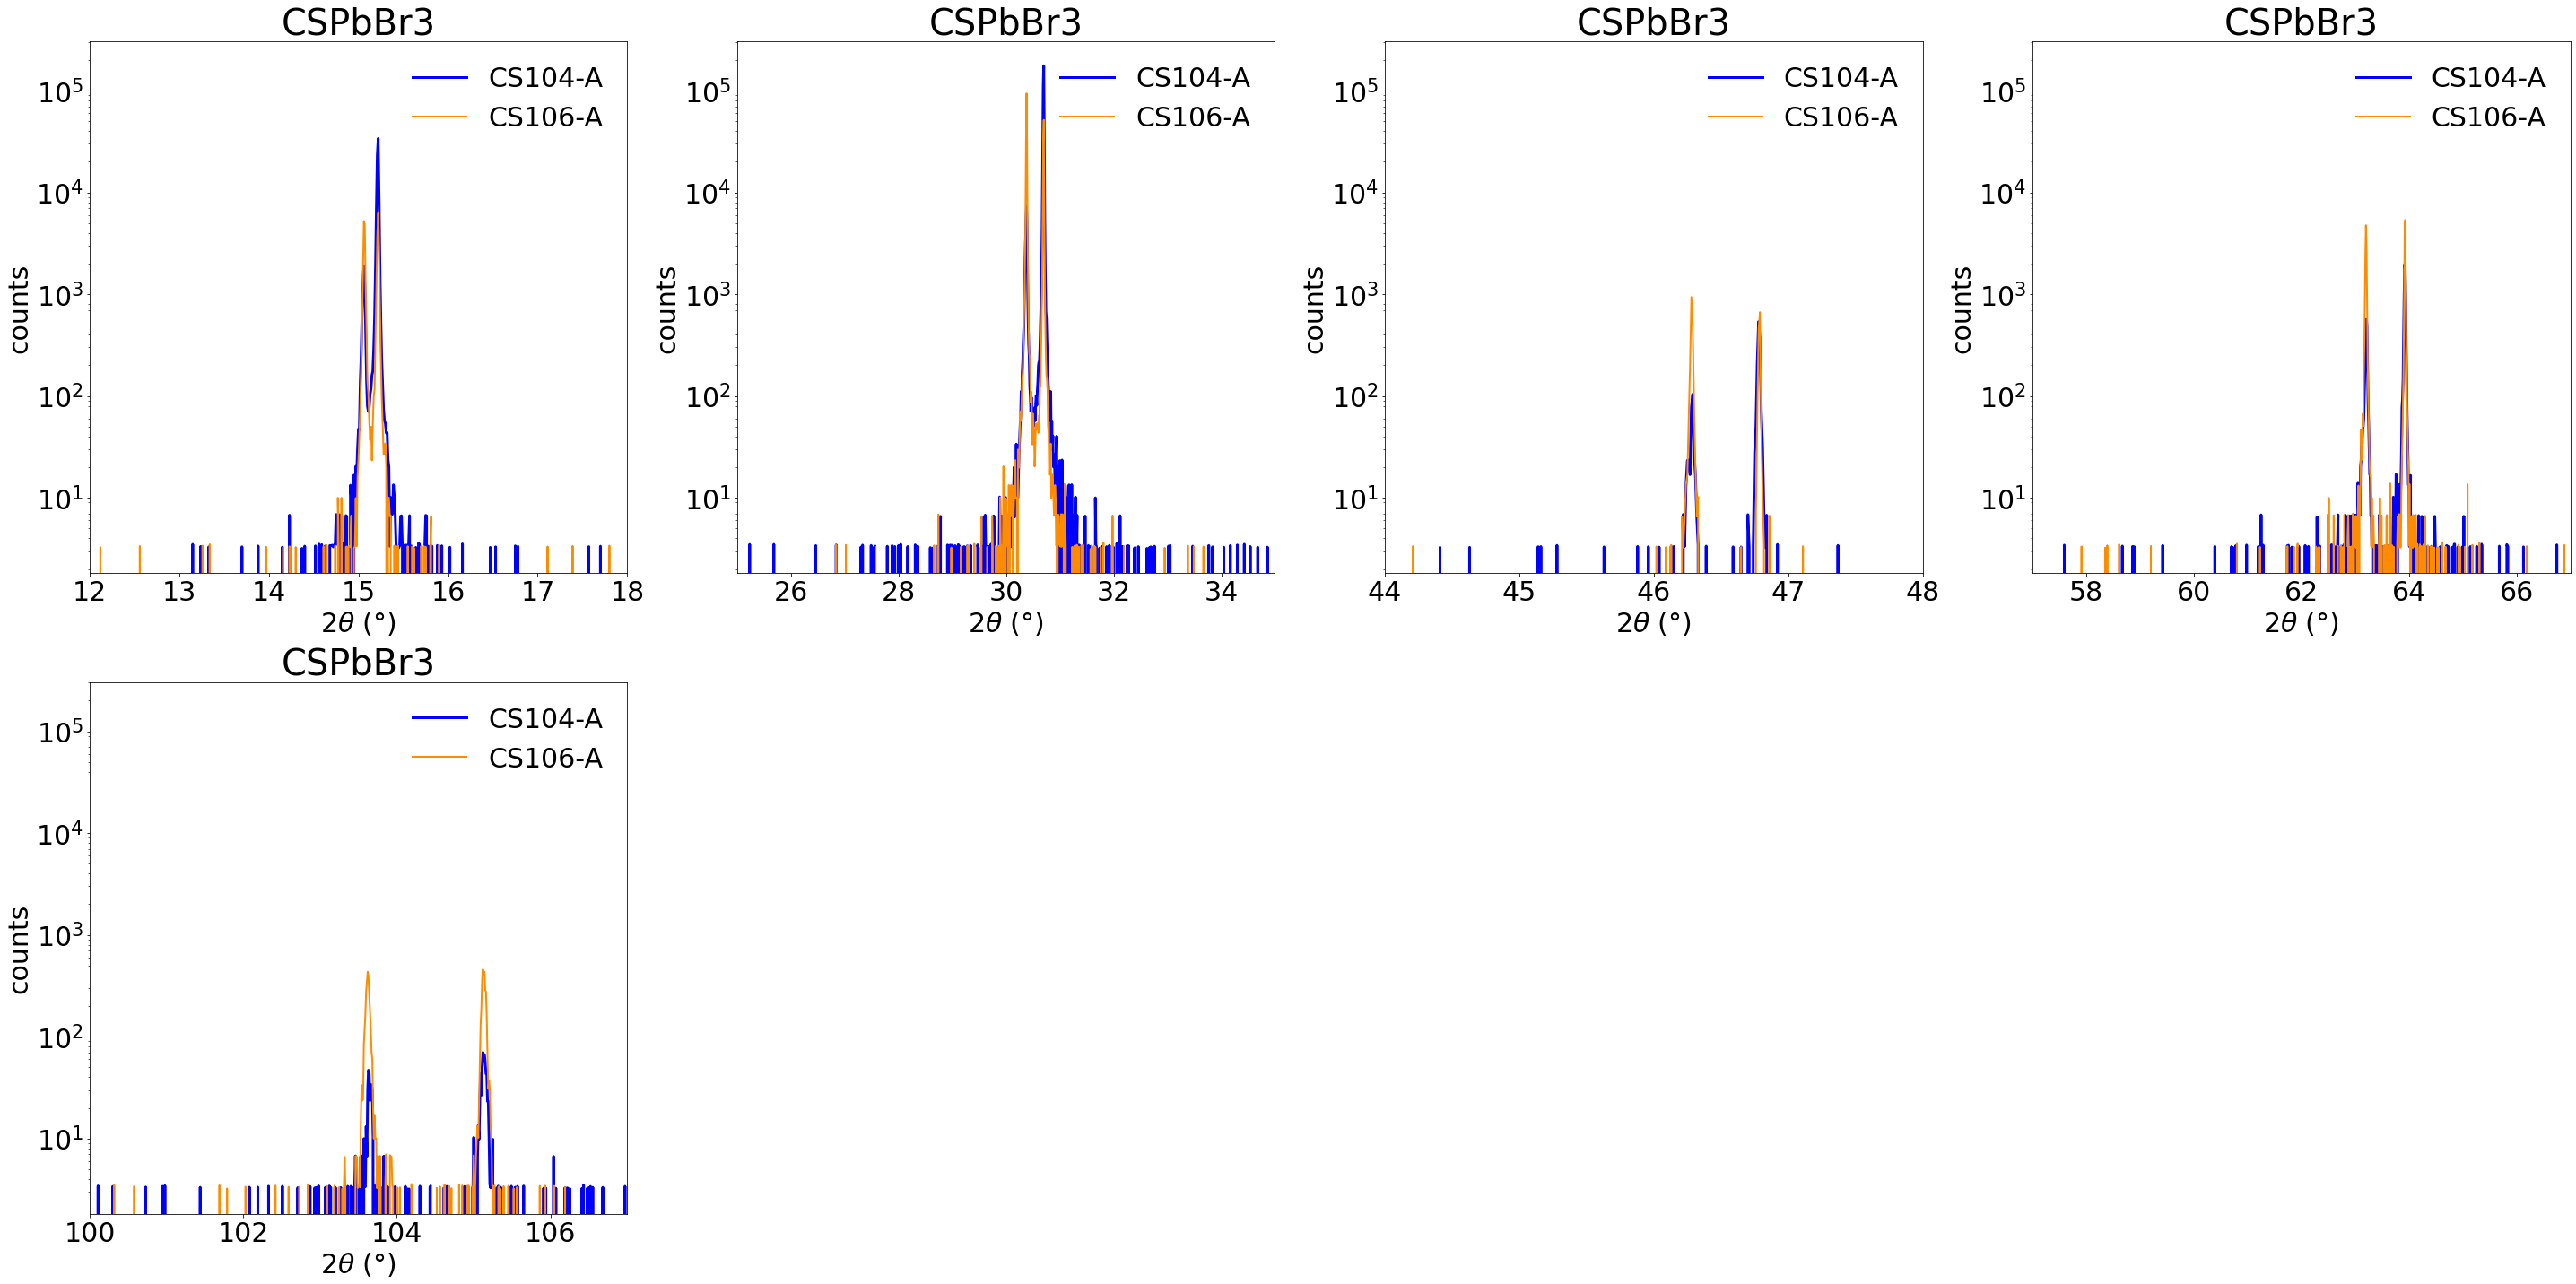

In [15]:
x_ranges = [(12, 18), (25, 35), (44, 48), (57, 67), (100,107)] 

plotpeakbypeak(x_ranges, df_CS104_A, df_CS106_A, "CSPbBr3", "CS104-A", "CS106-A","b" , "darkorange")